# 군집

In [1]:
from sklearn.datasets import load_iris
import pandas as pd

In [2]:
iris = load_iris()
X = iris.data

df = pd.DataFrame(X)
df

,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [3]:
from sklearn.cluster import KMeans #정답이 없어 훈련용 시험용 나눌 필요 x. 다 랜덤


model = KMeans(n_clusters=3, random_state=42)
model.fit(X)

,n_clusters,3
,init,'k-means++'
,n_init,'auto'
,max_iter,300
,tol,0.0001
,verbose,0
,random_state,42
,copy_x,True
,algorithm,'lloyd'


In [ ]:
print("클러스터 레이블: ",model.labels_) # 레이블 확인

클러스터 레이블:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 0 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 0 0 0 2 0 0 0 0
 0 0 2 2 0 0 0 0 2 0 2 0 2 0 0 2 2 0 0 0 0 0 2 0 0 0 0 2 0 0 0 2 0 0 0 2 0
 0 2]


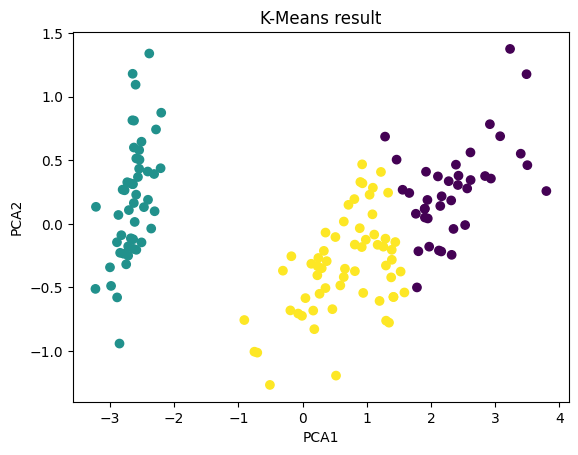

In [8]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

plt.scatter(X_pca[:,0], X_pca[:,1], c=model.labels_,cmap='viridis')
plt.title("K-Means result")
plt.xlabel("PCA1")
plt.ylabel("PCA2")
plt.show()

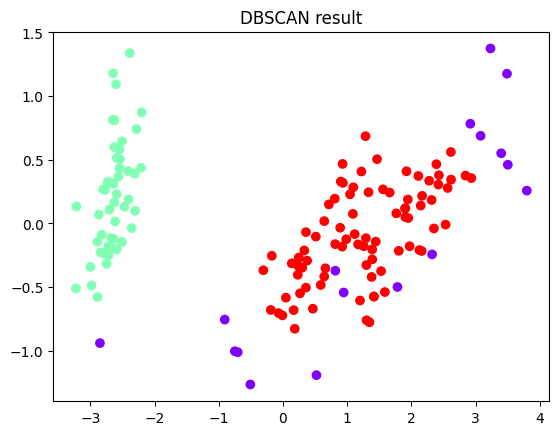

In [11]:
from sklearn.cluster import DBSCAN


model = DBSCAN(eps=0.5, min_samples=5) # eps값 : 반경 안에 있는 데이터들을 군집으로 설정 / min_samples = 5 는 최소 반경 안에 5개의 데이터는 있어야 한다.
labels = model.fit_predict(X)



plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='rainbow')
plt.title("DBSCAN result")
plt.show()

# 추천 시스템

In [ ]:
import pandas as pd

df = pd.read_csv('data/tmdb_5000_movies.csv')
df.head()



,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [23]:
movies_df = df[['id','title','genres','vote_average','vote_count','popularity','keywords','overview']]
pd.set_option('max_colwidth',100)
movies_df

,id,title,genres,vote_average,vote_count,popularity,keywords,overview
0,19995,Avatar,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {...",7.2,11800,150.437577,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"": 2964, ""name"": ""future""}, {""id"": 3386, ""name"": ""sp...","In the 22nd century, a paraplegic Marine is dispatched to the moon Pandora on a unique mission, ..."
1,285,Pirates of the Caribbean: At World's End,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""name"": ""Action""}]",6.9,4500,139.082615,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""name"": ""drug abuse""}, {""id"": 911, ""name"": ""exotic is...","Captain Barbossa, long believed to be dead, has come back to life and is headed to the edge of t..."
2,206647,Spectre,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 80, ""name"": ""Crime""}]",6.3,4466,107.376788,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name"": ""based on novel""}, {""id"": 4289, ""name"": ""secret...",A cryptic message from Bond’s past sends him on a trail to uncover a sinister organization. Whil...
3,49026,The Dark Knight Rises,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 18, ""name"": ""Drama""}, {""id"": ...",7.6,9106,112.312950,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853, ""name"": ""crime fighter""}, {""id"": 949, ""name"": ""te...","Following the death of District Attorney Harvey Dent, Batman assumes responsibility for Dent's c..."
4,49529,John Carter,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""name"": ""Adventure""}, {""id"": 878, ""name"": ""Science Fic...",6.1,2124,43.926995,"[{""id"": 818, ""name"": ""based on novel""}, {""id"": 839, ""name"": ""mars""}, {""id"": 1456, ""name"": ""medal...","John Carter is a war-weary, former military captain who's inexplicably transported to the myster..."
...,...,...,...,...,...,...,...,...
4798,9367,El Mariachi,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""name"": ""Crime""}, {""id"": 53, ""name"": ""Thriller""}]",6.6,238,14.269792,"[{""id"": 5616, ""name"": ""united states\u2013mexico barrier""}, {""id"": 33649, ""name"": ""legs""}, {""id""...","El Mariachi just wants to play his guitar and carry on the family tradition. Unfortunately, the ..."
4799,72766,Newlyweds,"[{""id"": 35, ""name"": ""Comedy""}, {""id"": 10749, ""name"": ""Romance""}]",5.9,5,0.642552,[],A newlywed couple's honeymoon is upended by the arrivals of their respective sisters.
4800,231617,"Signed, Sealed, Delivered","[{""id"": 35, ""name"": ""Comedy""}, {""id"": 18, ""name"": ""Drama""}, {""id"": 10749, ""name"": ""Romance""}, {""...",7.0,6,1.444476,"[{""id"": 248, ""name"": ""date""}, {""id"": 699, ""name"": ""love at first sight""}, {""id"": 2398, ""name"": ""...","""Signed, Sealed, Delivered"" introduces a dedicated quartet of civil servants in the Dead Letter ..."
4801,126186,Shanghai Calling,[],5.7,7,0.857008,[],"When ambitious New York attorney Sam is sent to Shanghai on assignment, he immediately stumbles ..."


In [24]:
movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4803 entries, 0 to 4802
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            4803 non-null   int64  
 1   title         4803 non-null   object 
 2   genres        4803 non-null   object 
 3   vote_average  4803 non-null   float64
 4   vote_count    4803 non-null   int64  
 5   popularity    4803 non-null   float64
 6   keywords      4803 non-null   object 
 7   overview      4800 non-null   object 
dtypes: float64(2), int64(2), object(4)
memory usage: 300.3+ KB


In [25]:
movies_df.iloc[0]['genres']

'[{"id": 28, "name": "Action"}, {"id": 12, "name": "Adventure"}, {"id": 14, "name": "Fantasy"}, {"id": 878, "name": "Science Fiction"}]'

In [ ]:
from ast import literal_eval

result = literal_eval(movies_df.iloc[0]['genres']) #문자열을 리스트로 바꿔주는 함수
result

[{'id': 28, 'name': 'Action'},
 {'id': 12, 'name': 'Adventure'},
 {'id': 14, 'name': 'Fantasy'},
 {'id': 878, 'name': 'Science Fiction'}]

In [27]:
movies_df['genres'] = movies_df['genres'].apply(literal_eval)
movies_df['genres']

C:\Users\user\AppData\Local\Temp\ipykernel_28816\3494617339.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres'] = movies_df['genres'].apply(literal_eval)


0       [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {...
1            [{'id': 12, 'name': 'Adventure'}, {'id': 14, 'name': 'Fantasy'}, {'id': 28, 'name': 'Action'}]
2              [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 80, 'name': 'Crime'}]
3       [{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 18, 'name': 'Drama'}, {'id': ...
4       [{'id': 28, 'name': 'Action'}, {'id': 12, 'name': 'Adventure'}, {'id': 878, 'name': 'Science Fic...
                                                       ...                                                 
4798            [{'id': 28, 'name': 'Action'}, {'id': 80, 'name': 'Crime'}, {'id': 53, 'name': 'Thriller'}]
4799                                       [{'id': 35, 'name': 'Comedy'}, {'id': 10749, 'name': 'Romance'}]
4800    [{'id': 35, 'name': 'Comedy'}, {'id': 18, 'name': 'Drama'}, {'id': 10749, 'name': 'Romance'}, {'...
4801                        

In [28]:
movies_df.iloc[0]['keywords']

'[{"id": 1463, "name": "culture clash"}, {"id": 2964, "name": "future"}, {"id": 3386, "name": "space war"}, {"id": 3388, "name": "space colony"}, {"id": 3679, "name": "society"}, {"id": 3801, "name": "space travel"}, {"id": 9685, "name": "futuristic"}, {"id": 9840, "name": "romance"}, {"id": 9882, "name": "space"}, {"id": 9951, "name": "alien"}, {"id": 10148, "name": "tribe"}, {"id": 10158, "name": "alien planet"}, {"id": 10987, "name": "cgi"}, {"id": 11399, "name": "marine"}, {"id": 13065, "name": "soldier"}, {"id": 14643, "name": "battle"}, {"id": 14720, "name": "love affair"}, {"id": 165431, "name": "anti war"}, {"id": 193554, "name": "power relations"}, {"id": 206690, "name": "mind and soul"}, {"id": 209714, "name": "3d"}]'

In [29]:
movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)
movies_df['keywords']

C:\Users\user\AppData\Local\Temp\ipykernel_28816\586770680.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['keywords'] = movies_df['keywords'].apply(literal_eval)


0       [{'id': 1463, 'name': 'culture clash'}, {'id': 2964, 'name': 'future'}, {'id': 3386, 'name': 'sp...
1       [{'id': 270, 'name': 'ocean'}, {'id': 726, 'name': 'drug abuse'}, {'id': 911, 'name': 'exotic is...
2       [{'id': 470, 'name': 'spy'}, {'id': 818, 'name': 'based on novel'}, {'id': 4289, 'name': 'secret...
3       [{'id': 849, 'name': 'dc comics'}, {'id': 853, 'name': 'crime fighter'}, {'id': 949, 'name': 'te...
4       [{'id': 818, 'name': 'based on novel'}, {'id': 839, 'name': 'mars'}, {'id': 1456, 'name': 'medal...
                                                       ...                                                 
4798    [{'id': 5616, 'name': 'united states–mexico barrier'}, {'id': 33649, 'name': 'legs'}, {'id': 162...
4799                                                                                                     []
4800    [{'id': 248, 'name': 'date'}, {'id': 699, 'name': 'love at first sight'}, {'id': 2398, 'name': '...
4801                        

## 장르 기준

In [31]:
name_result = []
for genre_temp in movies_df['genres']:
    # print(temp)
    names = []

    for temp in  genre_temp:
        name = temp['name']
        names.append(name)

    name_result.append(names)
movies_df['genres'] = name_result

C:\Users\user\AppData\Local\Temp\ipykernel_28816\3699378406.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres'] = name_result


In [32]:
movies_df['genres'] 

0       [Action, Adventure, Fantasy, Science Fiction]
1                        [Adventure, Fantasy, Action]
2                          [Action, Adventure, Crime]
3                    [Action, Crime, Drama, Thriller]
4                [Action, Adventure, Science Fiction]
                            ...                      
4798                        [Action, Crime, Thriller]
4799                                [Comedy, Romance]
4800               [Comedy, Drama, Romance, TV Movie]
4801                                               []
4802                                    [Documentary]
Name: genres, Length: 4803, dtype: object

## 키워드 기준

In [34]:
name_result = []
for keyword_temp in movies_df['keywords']:
    # print(temp)
    names = []

    for temp in  keyword_temp:
        name = temp['name']
        names.append(name)

    name_result.append(names)
movies_df['keywords'] = name_result

C:\Users\user\AppData\Local\Temp\ipykernel_28816\2105733873.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['keywords'] = name_result


In [35]:
movies_df['keywords'] 

0       [culture clash, future, space war, space colony, society, space travel, futuristic, romance, spa...
1       [ocean, drug abuse, exotic island, east india trading company, love of one's life, traitor, ship...
2                  [spy, based on novel, secret agent, sequel, mi6, british secret service, united kingdom]
3       [dc comics, crime fighter, terrorist, secret identity, burglar, hostage drama, time bomb, gotham...
4       [based on novel, mars, medallion, space travel, princess, alien, steampunk, martian, escape, edg...
                                                       ...                                                 
4798                                   [united states–mexico barrier, legs, arms, paper knife, guitar case]
4799                                                                                                     []
4800                             [date, love at first sight, narration, investigation, team, postal worker]
4801                        

## 장르로 추천 시스템

In [36]:
data_result = []
for temp in movies_df['genres']:
    data = (' ').join(temp)
    data_result.append(data)

movies_df['genres_literal'] = data_result
movies_df['genres_literal']

C:\Users\user\AppData\Local\Temp\ipykernel_28816\2613342820.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  movies_df['genres_literal'] = data_result


0       Action Adventure Fantasy Science Fiction
1                       Adventure Fantasy Action
2                         Action Adventure Crime
3                    Action Crime Drama Thriller
4               Action Adventure Science Fiction
                          ...                   
4798                       Action Crime Thriller
4799                              Comedy Romance
4800               Comedy Drama Romance TV Movie
4801                                            
4802                                 Documentary
Name: genres_literal, Length: 4803, dtype: object

In [37]:
# (' ').join(['Action', 'Adventure', 'Fantasy', 'Science Fiction'])

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer # 단어의 빈도 출현 기반으로 벡터화 함.

count_vect = CountVectorizer(min_df=1,ngram_range=(1,2)) #min_df : 최소 1번이상 출현하는 단어를 추출, ngram_range : Countervector를 할 때, 단어 사전을 만든다. 이 때 그냥 하게 되면, science fiction 같은 장르는 못찾는다.
# 이 때, 모든 단어에서 2자리 조합까지 1번 만든 담에 최소 1번이상 출현하는 단어를 추출해라 라는 뜻.
genre_vect = count_vect.fit_transform(movies_df['genres_literal'])
count_vect.vocabulary_

{'action': 0,
 'adventure': 16,
 'fantasy': 124,
 'science': 232,
 'fiction': 138,
 'action adventure': 1,
 'adventure fantasy': 24,
 'fantasy science': 135,
 'science fiction': 233,
 'fantasy action': 125,
 'crime': 64,
 'adventure crime': 20,
 'drama': 90,
 'thriller': 234,
 'action crime': 4,
 'crime drama': 68,
 'drama thriller': 106,
 'adventure science': 29,
 'animation': 33,
 'family': 109,
 'animation family': 38,
 'fantasy family': 130,
 'action science': 12,
 'adventure action': 17,
 'action thriller': 13,
 'thriller crime': 238,
 'western': 265,
 'adventure western': 32,
 'adventure family': 23,
 'family fantasy': 115,
 'fiction action': 139,
 'action fantasy': 7,
 'comedy': 44,
 'action comedy': 3,
 'comedy science': 59,
 'adventure drama': 22,
 'drama action': 91,
 'romance': 214,
 'drama romance': 104,
 'romance thriller': 228,
 'thriller action': 235,
 'fiction thriller': 150,
 'adventure thriller': 30,
 'fantasy adventure': 126,
 'family adventure': 111,
 'adventure com

In [40]:
genre_vect.shape

(4803, 276)

In [42]:
genre_vect_array = genre_vect.toarray()
genre_vect_array

array([[1, 1, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 1, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], shape=(4803, 276))

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

genre_sim = cosine_similarity(genre_vect_array,genre_vect_array) # 장르에 대한 유사도
genre_sim[128].argsort()[::-1] # 내림차순


# 1번 영화랑 1번 영화 유사도 : 1 -> 1번 영화 2번 영화 -> 0.5962... )

array([1092, 4650,  128, ..., 3696,   46,   47], shape=(4803,))

In [55]:
movies_df['title'].iloc[46] 

'X-Men: Days of Future Past'

In [59]:
genre_sim

array([[1.        , 0.59628479, 0.4472136 , ..., 0.        , 0.        ,
        0.        ],
       [0.59628479, 1.        , 0.4       , ..., 0.        , 0.        ,
        0.        ],
       [0.4472136 , 0.4       , 1.        , ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        1.        ]], shape=(4803, 4803))

In [65]:
def find_sim_movie(df, sorted_index, title_name, top_n = 10):
    title_movie = df[df['title'] == title_name]
    title_index = title_movie.index.values

    similar_index = sorted_index[title_index, : (top_n)] #similar_ index 에는 array([1092, 4650,  128, ..., 3696,   46,   47], shape=(4803,)) 의 정보가 top_n 까지 들어간다.
    similar_index = similar_index.reshape(-1)

    return df.iloc[similar_index]

genre_sim_sorted = genre_sim.argsort()[:,::-1]


movies_result = find_sim_movie(df, genre_sim_sorted, 'Superman', 10)
movies_result['title']



0                                          Avatar
46                     X-Men: Days of Future Past
3494    Beastmaster 2: Through the Portal of Time
870                                   Superman II
14                                   Man of Steel
813                                      Superman
1652                         Dragonball Evolution
1296                                 Superman III
420                   Hellboy II: The Golden Army
419                                        Jumper
Name: title, dtype: object

# 사용자 기반 협업 필터링(영화 평점)

In [66]:
from sklearn.metrics.pairwise import cosine_similarity

In [69]:
ratings = pd.read_csv("data/ratings.csv")
movies = pd.read_csv("data\movies.csv")

movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
9120,162672,Mohenjo Daro (2016),Adventure|Drama|Romance
9121,163056,Shin Godzilla (2016),Action|Adventure|Fantasy|Sci-Fi
9122,163949,The Beatles: Eight Days a Week - The Touring Years (2016),Documentary
9123,164977,The Gay Desperado (1936),Comedy


In [74]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,31,2.5,1260759144
1,1,1029,3.0,1260759179
2,1,1061,3.0,1260759182
3,1,1129,2.0,1260759185
4,1,1172,4.0,1260759205


In [75]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [ ]:
movie_ratings = pd.merge(ratings,movies,on='movieId')
movie_ratings #timestamp 는 특정 시점부터 얼만큼의 시간이 지났는 지 보여주는 것

,userId,movieId,rating,timestamp,title,genres
0,1,31,2.5,1260759144,Dangerous Minds (1995),Drama
1,1,1029,3.0,1260759179,Dumbo (1941),Animation|Children|Drama|Musical
2,1,1061,3.0,1260759182,Sleepers (1996),Thriller
3,1,1129,2.0,1260759185,Escape from New York (1981),Action|Adventure|Sci-Fi|Thriller
4,1,1172,4.0,1260759205,Cinema Paradiso (Nuovo cinema Paradiso) (1989),Drama
...,...,...,...,...,...,...
99999,671,6268,2.5,1065579370,Raising Victor Vargas (2002),Comedy|Drama|Romance
100000,671,6269,4.0,1065149201,Stevie (2002),Documentary
100001,671,6365,4.0,1070940363,"Matrix Reloaded, The (2003)",Action|Adventure|Sci-Fi|Thriller|IMAX
100002,671,6385,2.5,1070979663,Whale Rider (2002),Drama


In [ ]:
# pivot table 사용(왼쪽에 userid , 상단에 영화 title)
title_user = movie_ratings.pivot_table(index='userId', columns='title', values='rating')
title_user

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And God Spoke (1993),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Attitudes (2001),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Rifles (1969),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),"10th Kingdom, The (2000)","11'09""01 - September 11 (2002)",11:14 (2003),12 Angry Men (1957),12 Angry Men (1997),12 Years a Slave (2013),127 Hours (2010),12:08 East of Bucharest (A fost sau n-a fost?) (2006),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Tzameti (2005),"13th Warrior, The (1999)",...,Zach Galifianakis: Live at the Purple Onion (2006),Zack and Miri Make a Porno (2008),Zardoz (1974),Zathura (2005),Zatoichi on the Road (Zatôichi kenka-tabi) (Zatôichi 5) (1963),Zazie dans le métro (1960),"Zed & Two Noughts, A (1985)",Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zenon: Girl of the 21st Century (1999),Zenon: The Zequel (2001),Zenon: Z3 (2004),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zerophilia (2005),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980),Zombieland (2009),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoot Suit (1981),Zootopia (2016),Zorba the Greek (Alexis Zorbas) (1964),Zorn's Lemma (1970),"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [77]:
title_user = title_user.fillna(0)

title_user

title,"""Great Performances"" Cats (1998)",$9.99 (2008),'Hellboy': The Seeds of Creation (2004),'Neath the Arizona Skies (1934),'Round Midnight (1986),'Salem's Lot (2004),'Til There Was You (1997),"'burbs, The (1989)",'night Mother (1986),(500) Days of Summer (2009),*batteries not included (1987),...And God Spoke (1993),...And Justice for All (1979),1-900 (06) (1994),10 (1979),10 Attitudes (2001),10 Cloverfield Lane (2016),10 Items or Less (2006),10 Things I Hate About You (1999),10 Years (2011),"10,000 BC (2008)",100 Girls (2000),100 Rifles (1969),101 Dalmatians (1996),101 Dalmatians (One Hundred and One Dalmatians) (1961),101 Reykjavik (101 Reykjavík) (2000),102 Dalmatians (2000),"10th Kingdom, The (2000)","11'09""01 - September 11 (2002)",11:14 (2003),12 Angry Men (1957),12 Angry Men (1997),12 Years a Slave (2013),127 Hours (2010),12:08 East of Bucharest (A fost sau n-a fost?) (2006),13 Assassins (Jûsan-nin no shikaku) (2010),13 Ghosts (1960),13 Going on 30 (2004),13 Tzameti (2005),"13th Warrior, The (1999)",...,Zach Galifianakis: Live at the Purple Onion (2006),Zack and Miri Make a Porno (2008),Zardoz (1974),Zathura (2005),Zatoichi on the Road (Zatôichi kenka-tabi) (Zatôichi 5) (1963),Zazie dans le métro (1960),"Zed & Two Noughts, A (1985)",Zeitgeist: The Movie (2007),Zelary (2003),Zelig (1983),Zenon: Girl of the 21st Century (1999),Zenon: The Zequel (2001),Zenon: Z3 (2004),Zero Dark Thirty (2012),Zero Effect (1998),"Zero Theorem, The (2013)",Zerophilia (2005),Zodiac (2007),Zombeavers (2014),Zombie (a.k.a. Zombie 2: The Dead Are Among Us) (Zombi 2) (1979),Zombie Holocaust (a.k.a. Doctor Butcher M.D.) (Zombi Holocaust) (1980),Zombieland (2009),Zoolander (2001),Zoolander 2 (2016),Zoom (2006),Zoot Suit (1981),Zootopia (2016),Zorba the Greek (Alexis Zorbas) (1964),Zorn's Lemma (1970),"Zorro, the Gay Blade (1981)",Zulu (1964),Zulu (2013),[REC] (2007),eXistenZ (1999),loudQUIETloud: A Film About the Pixies (2006),xXx (2002),xXx: State of the Union (2005),¡Three Amigos! (1986),À nous la liberté (Freedom for Us) (1931),İtirazım Var (2014)
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,

In [78]:
user_based_result = cosine_similarity(title_user, title_user)

user_based_df = pd.DataFrame(user_based_result, index=title_user.index,columns=title_user.index)
user_based_df

userId,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,...,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671
userId,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,1.000000,0.000000,0.000000,0.074482,0.016818,0.000000,0.083884,0.000000,0.012843,0.000000,0.000000,0.000000,0.000000,0.000000,0.059387,0.000000,0.021073,0.000000,0.085631,0.016564,0.057331,0.043682,0.070243,0.000000,0.014915,0.002621,0.035015,0.000000,0.000000,0.061301,0.023793,0.031707,0.008213,0.084597,0.130585,0.016528,0.000000,0.032825,0.020391,0.000000,...,0.000000,0.000000,0.194093,0.000000,0.000000,0.000000,0.000000,0.024281,0.000000,0.038899,0.000000,0.000000,0.000000,0.000000,0.052856,0.046561,0.005580,0.000000,0.000000,0.000000,0.000000,0.000000,0.074028,0.000000,0.015985,0.000000,0.034005,0.000000,0.000000,0.032306,0.000000,0.000000,0.014481,0.043719,0.000000,0.000000,0.000000,0.062917,0.000000,0.017466
2,0.000000,1.000000,0.124295,0.118821,0.103646,0.000000,0.212985,0.113190,0.113333,0.043213,0.049610,0.016071,0.128960,0.000000,0.136580,0.048412,0.060426,0.054766,0.256479,0.167955,0.180859,0.143790,0.122704,0.214799,0.000000,0.111960,0.107476,0.016437,0.000000,0.166448,0.057055,0.452546,0.004727,0.109546,0.042192,0.355130,0.020342,0.103204,0.246180,0.019323,...,0.142848,0.443909,0.010871,0.093096,0.033331,0.030166,0.000000,0.370156,0.049341,0.369722,0.007904,0.035417,0.045604,0.026773,0.092707,0.136962,0.066631,0.551430,0.085408,0.000000,0.047173,0.205720,0.222747,0.067919,0.009200,0.333259,0.216203,0.393892,0.017731,0.024790,0.477306,0.063202,0.077784,0.164162,0.466281,0.425462,0.084646,0.024140,0.170595,0.113175
3,0.000000,0.124295,1.000000,0.081640,0.151531,0.060691,0.154714,0.249781,0.134475,0.114672,0.092004,0.095312,0.195484,0.062571,0.131251,0.097897,0.176442,0.011278,0.106106,0.172748,0.082124,0.182888,0.172866,0.159962,0.036815,0.181142,0.194458,0.034696,0.111384,0.125015,0.226832,0.130597,0.056062,0.098228,0.033398,0.120349,0.068705,0.178289,0.094997,0.128190,...,0.229619,0.169202,0.075401,0.158701,0.058392,0.061858,0.042334,0.153574,0.028306,0.105967,0.000000,0.138840,0.084083,0.000000,0.080373,0.102714,0.143634,0.125203,0.028280,0.131057,0.051100,0.161292,0.181634,0.117485,0.038839,0.197401,0.232685,0.141984,0.050617,0.084722,0.161205,0.064198,0.176222,0.158357,0.177098,0.124562,0.124911,0.080984,0.136606,0.170193
4,0.074482,0.118821,0.081640,1.000000,0.130649,0.079648,0.319745,0.191013,0.030417,0.137186,0.018987,0.052249,0.105478,0.071728,0.233575,0.022853,0.138380,0.023087,0.290371,0.114549,0.315532,0.203279,0.178968,0.088550,0.053695,0.084756,0.033172,0.093853,0.000000,0.257187,0.092191,0.154996,0.109314,0.209807,0.044276,0.077666,0.066972,0.069970,0.057695,0.062289,...,0.067255,0.161344,0.080530,0.124318,0.043110,0.018621,0.012999,0.069929,0.074287,0.143050,0.045539,0.069960,0.071423,0.078574,0.255233,0.142036,0.077174,0.119910,0.017367,0.158329,0.066721,0.103730,0.317804,0.140981,0.105400,0.079348,0.118274,0.136952,0.055456,0.010882,0.114319,0.047228,0.136647,0.254030,0.121905,0.088735,0.068483,0.104309,0.054512,0.211609
5,0.016818,0.103646,0.151531,0.130649,1.000000,0.063796,0.095888,0.165712,0.086616,0.032370,0.020693,0.035645,0.144309,0.075099,0.187414,0.123023,0.106158,0.028123,0.119567,0.092324,0.094869,0.152817,0.216385,0.057132,0.053044,0.061786,0.058037,0.008570,0.033347,0.182344,0.069263,0.144976,0.112342,0.078053,0.000000,0.052398,0.174547,0.076018,0.055112,0.000000,...,0.068287,0.148831,0.049664,0.066039,0.028373,0.029958,0.000000,0.119903,0.081270,0.154146,0.000000,0.035172,0.056418,0.146769,0.175389,0.043762,0.172949,0.136585,0.021288,0.036086,0.076140,0.196560,0.310034,0.126748,0.114020,0.079588,0.095881,0.102296,0.018783,0.000000,0.191029,0.021142,0.146246,0.224245,0.139721,0.058252,0.042926,0.038358,0.062642,0.225086


In [ ]:
user_based_df.iloc[0].sort_values(ascending=False)[1:6] # 큰 순서 -> 작은 순서 나열 -> 가장 유사한 top 5 만 가져오기

userId
325    0.371852
634    0.194093
341    0.162819
310    0.157524
207    0.152746
Name: 1, dtype: float64

In [81]:
# 순서
## 내가 본 거
## 상대가 본 것 중 평점 4점 이상
## 1 - 2

In [86]:
title_user.iloc[0].index[0]

'"Great Performances" Cats (1998)'

In [ ]:
my_list = []

for index, rating in enumerate(title_user.iloc[0]):
    if rating > 0:
        my_list.append(title_user.iloc[0].index[index])

print('0번 유저가 본 영화의 갯수 : ', len(my_list))
print(my_list)
        

0번 유저가 본 영화의 갯수 :  20
['Antz (1998)', 'Beavis and Butt-Head Do America (1996)', 'Ben-Hur (1959)', 'Blazing Saddles (1974)', 'Cape Fear (1991)', 'Cinema Paradiso (Nuovo cinema Paradiso) (1989)', 'Dangerous Minds (1995)', 'Deer Hunter, The (1978)', "Dracula (Bram Stoker's Dracula) (1992)", 'Dumbo (1941)', 'Escape from New York (1981)', 'Fly, The (1986)', 'French Connection, The (1971)', 'Gandhi (1982)', 'Gods Must Be Crazy, The (1980)', 'Sleepers (1996)', 'Star Trek: The Motion Picture (1979)', 'Time Bandits (1981)', 'Tron (1982)', 'Willow (1988)']


In [93]:
u_data = title_user.loc[325]
u_list= u_data[u_data >= 4].index
u_list

Index(['Beverly Hills Cop (1984)', 'Brady Bunch Movie, The (1995)',
       'Dangerous Minds (1995)', 'My Best Friend's Wedding (1997)'],
      dtype='object', name='title')

In [ ]:
# ex)
data1 = ['A','B','C']
data2 = ['A','B','D']
set(data2) - set(data1)

{'D'}

In [96]:
print(u_list)
print('='*50)
print(my_list)

Index(['Beverly Hills Cop (1984)', 'Brady Bunch Movie, The (1995)',
       'Dangerous Minds (1995)', 'My Best Friend's Wedding (1997)'],
      dtype='object', name='title')
['Antz (1998)', 'Beavis and Butt-Head Do America (1996)', 'Ben-Hur (1959)', 'Blazing Saddles (1974)', 'Cape Fear (1991)', 'Cinema Paradiso (Nuovo cinema Paradiso) (1989)', 'Dangerous Minds (1995)', 'Deer Hunter, The (1978)', "Dracula (Bram Stoker's Dracula) (1992)", 'Dumbo (1941)', 'Escape from New York (1981)', 'Fly, The (1986)', 'French Connection, The (1971)', 'Gandhi (1982)', 'Gods Must Be Crazy, The (1980)', 'Sleepers (1996)', 'Star Trek: The Motion Picture (1979)', 'Time Bandits (1981)', 'Tron (1982)', 'Willow (1988)']


In [95]:
set(u_list) - set(my_list)

{'Beverly Hills Cop (1984)',
 'Brady Bunch Movie, The (1995)',
 "My Best Friend's Wedding (1997)"}